In [3]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from random import sample
numofDrug = 708
numofProtein = 1512
featureFusion = list()
positiveFeature = list()
negativeFeature = list()
featureLable = list()

In [5]:
#def featureFusion(featureFile1,featureFile2,interactionFile):
feature1 = np.loadtxt("DrugFeature.txt")
feature1Norm = preprocessing.normalize(feature1,axis = 0)
feature2 = np.loadtxt("ProteinFeature.txt")
feature2Norm = preprocessing.normalize(feature2,axis = 0)
np.savetxt("drugFeatureNorm.txt",feature1Norm)
np.savetxt("proteinFeatureNorm.txt",feature2Norm)
interaction = np.loadtxt("mat_drug_protein.txt")
np.shape(interaction)  
for i in range(numofDrug):
    for j in range(numofProtein):
        if interaction[i][j]==1:
            positiveFeature.append(np.concatenate((feature1Norm[i],feature2Norm[j]),axis = None))
        else:
            negativeFeature.append(np.concatenate((feature1Norm[i],feature2Norm[j]),axis = None))
#         featureFusion.append(np.concatenate((feature1Norm[i],feature2Norm[j]),axis = None))
#         featureLable.append(interaction[i][j])
len(positiveFeature)

1923

In [11]:
# np.savetxt("featureFusion.txt",featureFusion)
# np.savetxt("featureLable.txt",featureLable)
#np.savetxt("positiveFeature.txt",positiveFeature)
#np.savetxt("negativeFeature.txt",negativeFeature)

KeyboardInterrupt: 

In [31]:
negativeSamples = sample(negativeFeature,2*len(positiveFeature))
inputData = list()
inputData = np.concatenate((positiveFeature,negativeSamples))
inputLable = np.repeat(np.array([1,0]),[len(positiveFeature),len(negativeSamples)],axis = 0)
len(inputLable)

5769

In [32]:
from sklearn import svm
X_train,X_test,y_train,y_test = train_test_split(inputData,inputLable,test_size = 0.1, random_state = 0)
modelSVM = svm.SVC(kernel = "linear",C=1).fit(X_train,y_train)
modelSVM.score(X_test,y_test)

0.8405545927209706

In [33]:
from sklearn.model_selection import cross_val_score 
scoresSVM = cross_val_score(modelSVM,inputData,inputLable,cv=10)
scoresSVM

array([0.79930796, 0.83564014, 0.82179931, 0.78856153, 0.81282496,
       0.78162912, 0.78125   , 0.80555556, 0.83854167, 0.81770833])

In [34]:
print("Accuracy:%0.2f(+/- %0.2f)" % (scoresSVM.mean(),scoresSVM.std()*2))

Accuracy:0.81(+/- 0.04)


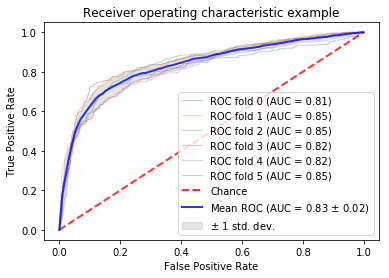

In [40]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
X = inputData
y = inputLable
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,random_state=random_state)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
